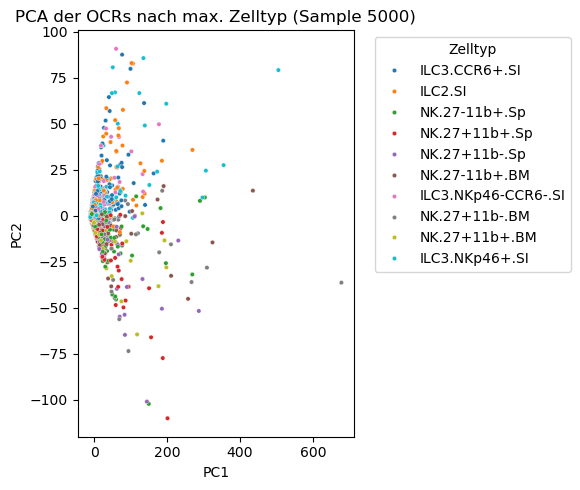

C:\Users\janna\AppData\Local\Temp\ipykernel_15760\2405586714.py:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:,0], pca_result[:,1], cmap='viridis', s=50)


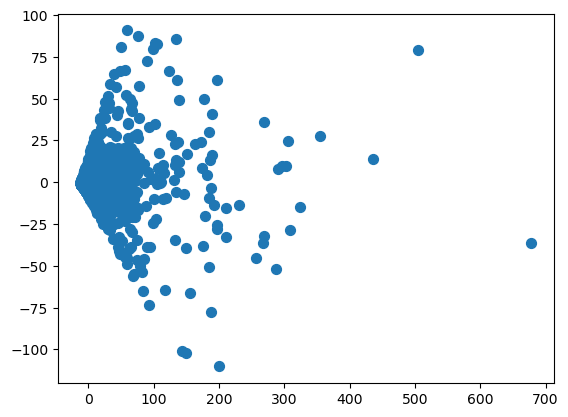

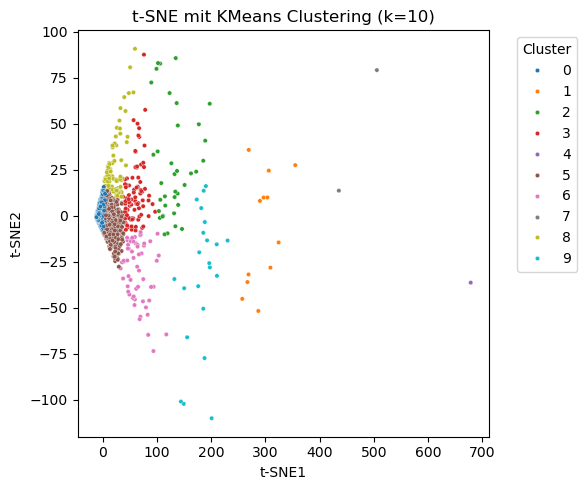

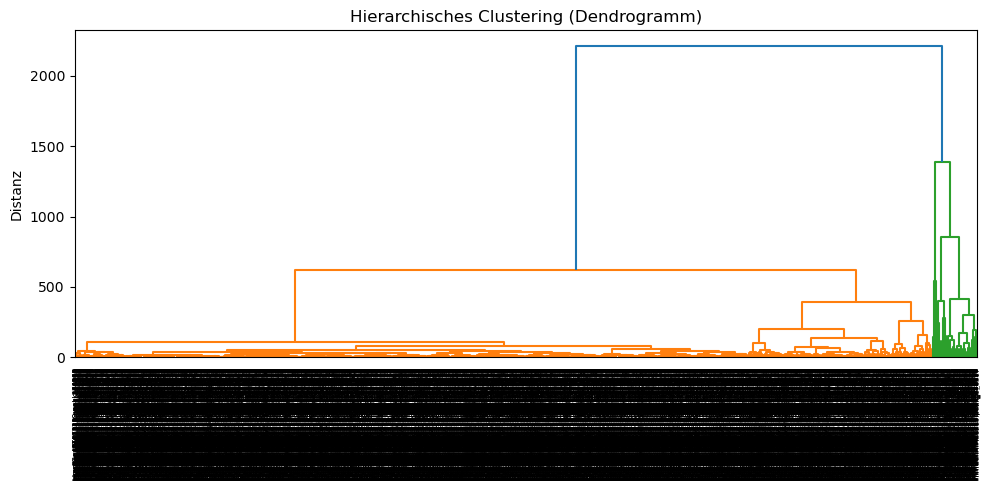

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# CSV einlesen
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', encoding='latin1')

# Zelltypen-Spalten
celltype_cols = [
    "ILC2.SI", "ILC3.NKp46-CCR6-.SI", "ILC3.NKp46+.SI", "ILC3.CCR6+.SI",
    "NK.27+11b-.BM", "NK.27+11b+.BM", "NK.27-11b+.BM",
    "NK.27+11b-.Sp", "NK.27+11b+.Sp", "NK.27-11b+.Sp"
]

# OCR IDs als Index
ocr_ids = df_raw.iloc[:, 0].values
df_expr = df_raw[celltype_cols]
df_expr.index = ocr_ids
df_expr.index.name = "OCR_ID"

# Sample von 5000 OCRs
df_sample = df_expr.sample(n=5000, random_state=42)

# Maximaler Zelltyp je OCR (für Farbgebung)
max_celltypes = df_sample.idxmax(axis=1)

# PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_sample)



# PCA Plot mit Färbung nach Zelltyp
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=max_celltypes, s=10, palette="tab10")
plt.title("PCA der OCRs nach max. Zelltyp (Sample 5000)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Zelltyp")
plt.tight_layout()
plt.show()



from sklearn.cluster import KMeans

# Anzahl der Cluster (z.B. 6 – passe das je nach Ergebnis an)
n_clusters = 10

# KMeans Clustering auf t-SNE-Daten
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_result)
plt.scatter(pca_result[:,0], pca_result[:,1], cmap='viridis', s=50)

# Plot t-SNE mit KMeans Clustern
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette="tab10", s=10)
plt.title(f"t-SNE mit KMeans Clustering (k={n_clusters})")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

linkage_matrix = linkage(df_sample, method='ward')
# Dendrogramm
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df_sample.index, leaf_rotation=90)
plt.title("Hierarchisches Clustering (Dendrogramm)")
plt.ylabel("Distanz")
plt.tight_layout()
plt.show()
